In [1]:
import pandas as pd

# Loading Dataset

In [2]:
df = pd.read_csv ('2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')

In [3]:
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


# Data Exploration and Cleaning

In [4]:
# No Null Values
print(df.isnull().sum())
print(df.isna().sum())

order_id          0
shop_id           0
user_id           0
order_amount      0
total_items       0
payment_method    0
created_at        0
dtype: int64
order_id          0
shop_id           0
user_id           0
order_amount      0
total_items       0
payment_method    0
created_at        0
dtype: int64


In [5]:
# Seems to line up with data set description
# No repeat orders
df.nunique()

order_id          5000
shop_id            100
user_id            301
order_amount       258
total_items          8
payment_method       3
created_at        4991
dtype: int64

In [6]:
df.set_index('order_id', inplace=True)

In [7]:
df.dtypes

shop_id            int64
user_id            int64
order_amount       int64
total_items        int64
payment_method    object
created_at        object
dtype: object

In [8]:
df['created_at'] = pd.to_datetime(df['created_at'])
df.dtypes

shop_id                    int64
user_id                    int64
order_amount               int64
total_items                int64
payment_method            object
created_at        datetime64[ns]
dtype: object

In [9]:
# AOV (mean of order_amount) same as described
# mean of order_amount and total_items much greater than median (50%) -> Outlier Suspected
df.describe()

,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.00000
mean,50.078800,849.092400,3145.128000,8.78720
std,29.006118,87.798982,41282.539349,116.32032
min,1.000000,607.000000,90.000000,1.00000
25%,24.000000,775.000000,163.000000,1.00000
50%,50.000000,849.000000,284.000000,2.00000
75%,75.000000,925.000000,390.000000,3.00000
max,100.000000,999.000000,704000.000000,2000.00000


<AxesSubplot:>

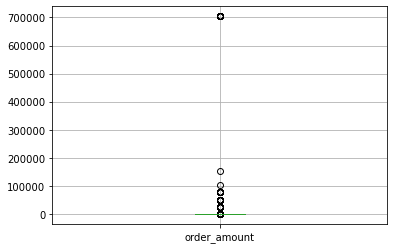

In [10]:
df.boxplot(column='order_amount')

array([[<AxesSubplot:title={'center':'order_amount'}>]], dtype=object)

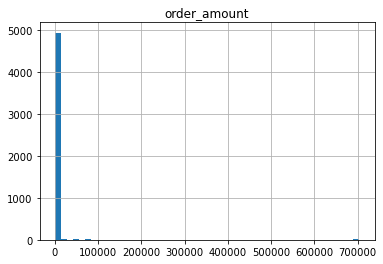

In [11]:
df.hist(column='order_amount', bins=50)

<AxesSubplot:>

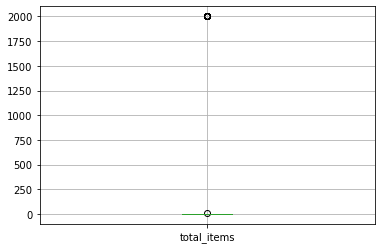

In [12]:
df.boxplot(column='total_items')

array([[<AxesSubplot:title={'center':'total_items'}>]], dtype=object)

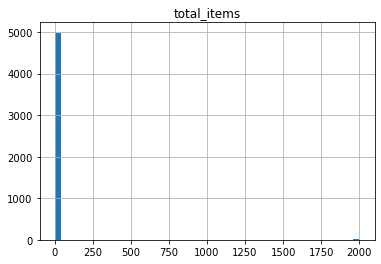

In [13]:
df.hist(column='total_items', bins = 50)

# Conclusion

a) Outlier present significantly affected the AOV metric. A better way for evaluating this data using the same metric could be to remove datapoints below and above the 1st and 3rd quartiles in terms of order amount, essentially removing the outliers within the data. However, this needs to be done carefully depending on the dataset and its distribution. 



b) A better metric to be used instead will be the Median Order Value as it is not affected by outliers. 

c) The value of Median Order Value for the dataset will be $284.00